# Setup Environment

### Setting up virtual environment from scratch

>PURELY INFORMATIONAL---Do not repeat these steps (unless using a Linux/Mac)

To create the yaml file: 
- Step 1: Opened a terminal and ran the following code:
- Step 2: "conda env create --name ml_upskill_env"
- Step 3: "conda activate ml_upskill_env"
- Step 4: Installed all the packages (windows based, yaml will only work on windows) 
  - Packages: pandas, seaborn, ydata_profiling, setuptools, ipywidgets, PyQt5==5.15.10
- Step 5: conda env export > ml_upskill_env.yaml 



### Setting up virtual environment from yaml file
- Step 1: Opened a terminal and ran the following code:
- Step 2: "conda env create --name ml_upskill_env --file=ml_upskill_env.yml"
- Step 3: "conda activate ml_upskill_env"


In [1]:
# Import necessary libraries
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import json
from ydata_profiling import ProfileReport


## Setup Data

In [2]:
# Set wd
working_directory = os.getcwd()

In [3]:
# Set file of interest
data_file_name = 'gold.csv'
data_path = os.path.join(os.path.dirname(working_directory),'data', data_file_name)
data_file = pd.read_csv(data_path, parse_dates=True, index_col="Date")
data_file.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-04,289.5,289.5,280.0,283.7,21621,USD
2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2000-01-06,281.6,282.8,280.2,282.4,19055,USD
2000-01-07,282.5,284.5,282.0,282.9,11266,USD
2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [10]:
# Run profile report and save to html. Open html in browser
profile = ProfileReport(data_file, title="Profiling Report")
profile.to_file(data_file_name[:-4]+"_data_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\aliso\AppData\ipykernel_24252\1151103337.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
c:\Users\aliso\.conda\envs\ml_upskill_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aliso\.conda\envs\ml_upskill_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


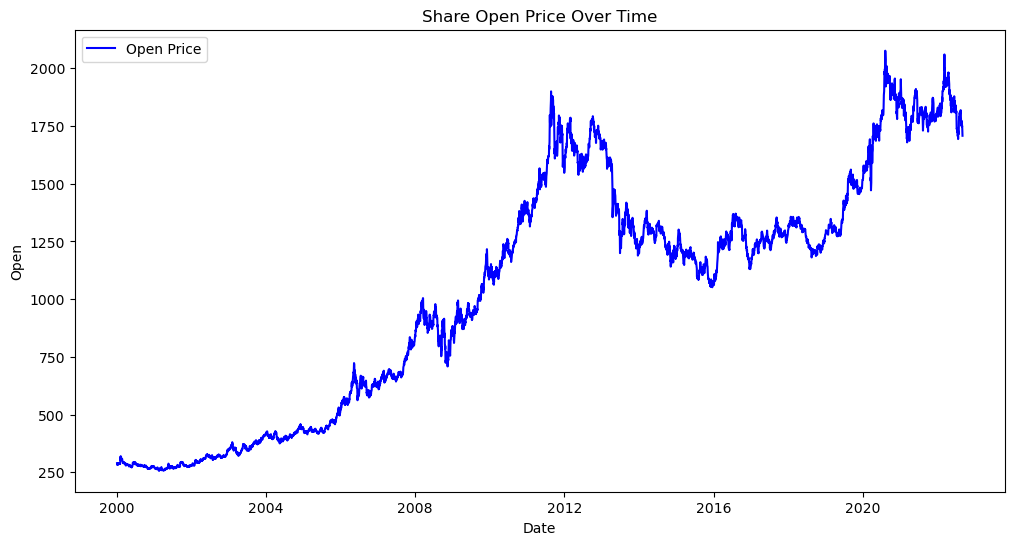

In [7]:
# We don't want to alter our input data_file
df = deepcopy(data_file)

# Let's start plotting
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x=df.index, y=df.Open, label='Open Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Share Open Price Over Time')

plt.show()